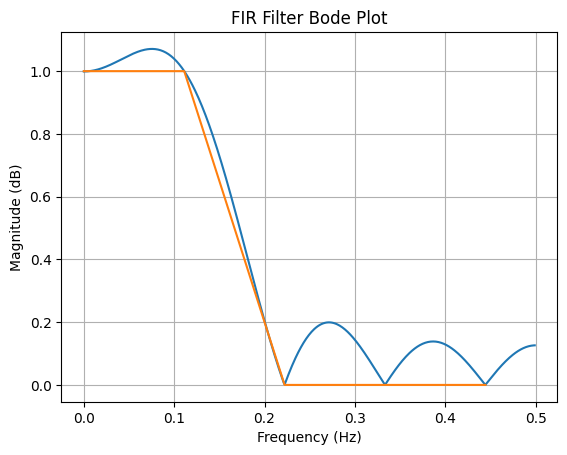

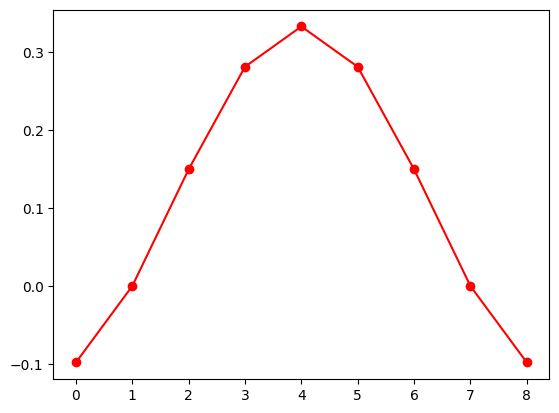

In [31]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt


def plot_fir_filter_bode(ir, fs=1):
    # Compute the frequency response
    frequencies, response = signal.freqz(ir, fs=fs)

    # Extract the magnitude (module) of the frequency response
    magnitude = np.abs(response)

    # Convert frequencies to Hz
    frequencies_hz = frequencies

    # Plot the Bode plot
    fig, ax = plt.subplots()
    ax.plot(frequencies_hz, magnitude)
    ax.plot([0,1/9,2/9,3/9,4/9], [1,1,0,0,0])
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Magnitude (dB)')
    ax.set_title('FIR Filter Bode Plot')
    ax.grid(True)
    plt.show()



# Plot the Bode plot
plot_fir_filter_bode([-0.098, 0, 0.1497, 0.2813, 0.333,0.2813,0.1497,0,-0.098])
plt.plot([-0.098, 0, 0.1497, 0.2813, 0.333,0.2813,0.1497,0,-0.098], 'ro-')

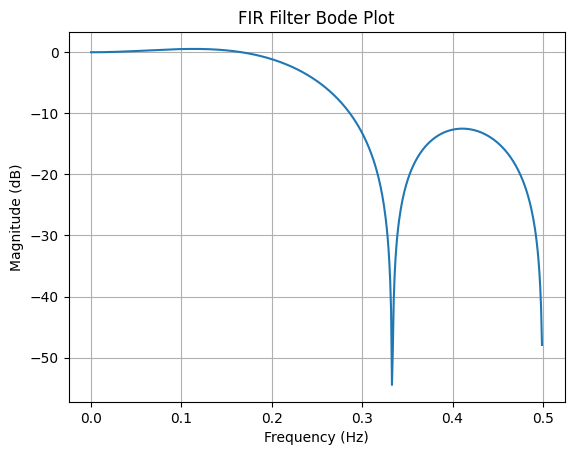

In [24]:
hn = []

for n in range(6):
    hn.append(1/6 * (1-2*np.cos(np.pi/3 * (n+0.5))))


plot_fir_filter_bode(hn)

0.8697490026177834


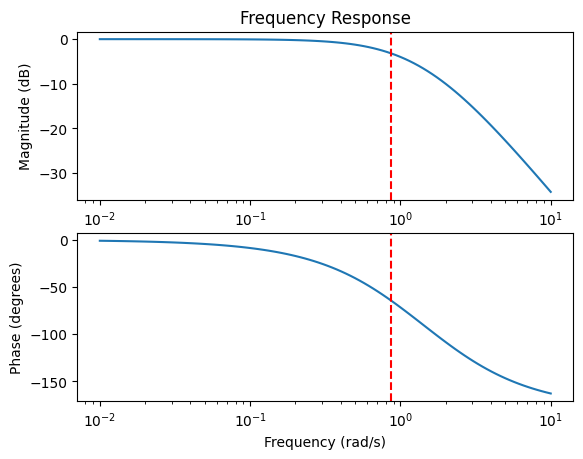

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

def plot_frequency_response():
    # Define the transfer function H(s)
    num = [2]
    den = [1, 3, 2]  # (s+1)(s+2) = s^2 + 3s + 2

    # Create the transfer function
    sys = signal.TransferFunction(num, den)

    # Generate the frequency response
    w, mag, phase = signal.bode(sys)

    # Find the -3dB cutoff point
    cutoff_idx = np.argmax(mag <= -3)  # Find index where magnitude <= -3dB
    cutoff_freq = w[cutoff_idx]  # Get the corresponding frequency
    print(cutoff_freq)

    # Create the plot
    fig, (ax1, ax2) = plt.subplots(2, 1)
    ax1.semilogx(w, mag)  # Magnitude plot
    ax1.axvline(x=cutoff_freq, color='r', linestyle='--')  # Mark the cutoff frequency
    ax1.set(title='Frequency Response', ylabel='Magnitude (dB)')

    ax2.semilogx(w, phase)  # Phase plot
    ax2.axvline(x=cutoff_freq, color='r', linestyle='--')  # Mark the cutoff frequency
    ax2.set(xlabel='Frequency (rad/s)', ylabel='Phase (degrees)')

    plt.show()

# Call the function to plot the frequency response
plot_frequency_response()